In [2]:
#Import all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#Number of Centroids
k=5

#Creates a list of lists (A of B) where length of A is 500, lengths of all B is 2, centers is the number of clusters 
#X,_=make_blobs(n_samples=500,n_features=2,centers=k, random)

#If you want to generate a correspoding y vector too, uncomment the below statement and run this cell
X,_ =make_blobs(n_samples=500,n_features=2,centers=k,random_state=10)

#Sample the shape to know how many (rows,columns) are present in your synthetic dataset
#This dataset has 2 columns which are "x coordinate" and "y coordinate" and each row is a datapoint
print("COLOR COORDINATES:")
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

COLOR COORDINATES:
Shape = (500, 2)
Sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


In [3]:
#DEFINE ALL THE FUNCTIONS & VARIABLES WE NEED TO DO CLUSTERING

#The data processing in this cell has already been done by scientists to provide to you.
#Initiaize the colours
color=["darkturquoise","darkorange","teal","darkviolet","tomato"]

#Create an empty dictionary to store the cluster name, centroid and points associated with the cluster.
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []
      
      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary 

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    
    for ix in range(X.shape[0]):#iterate for all datapoints

        #Foe each datapoint, find the distance to k centroids
        distance_of_i = [] 
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w 
            #all the point with all the five (k) cluster centers
            distance_of_i.append(d)
          
        #Based on the distances to k centroid, pick which cluster to assign it to
        #here we want find the minimum distance of cluster centers
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix]) 

#STEP 3: UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_ke_points = clusters[kx]['points']
        
        cluster_ke_points = np.array(cluster_ke_points)
        #here pts are array of list but we want array of array so
        
        if len(cluster_ke_points)>0:
            new_center = np.mean(cluster_ke_points, axis=0) #axis is along rows so will 
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge 

In [4]:
#We need to visualize this too. Lets define a function that can do that!
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)
        
        #plotting points associated /nearest to the cluster centers
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)
        
        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="*")

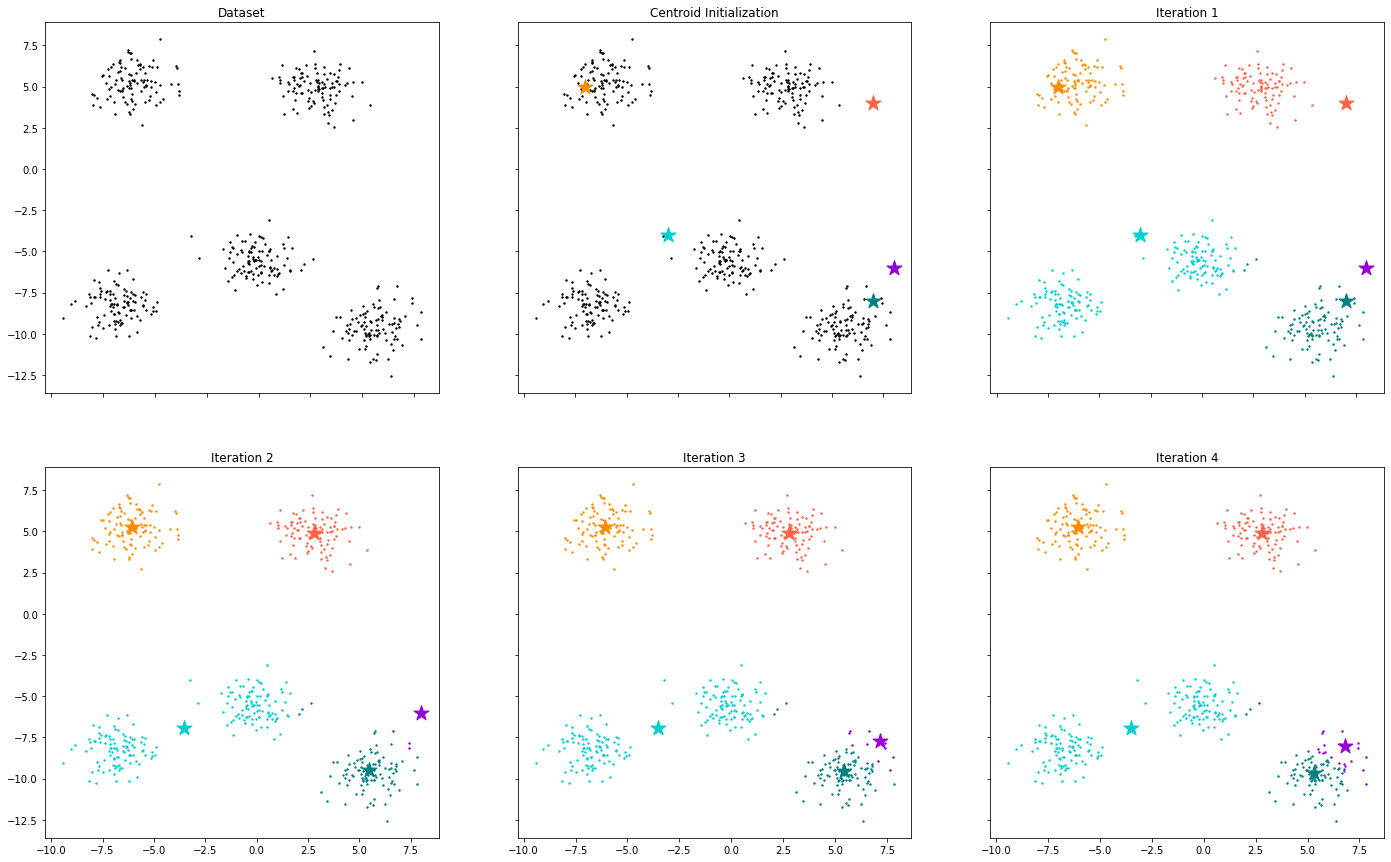

In [10]:
#Lets create a 6 panel plot showing how the cluster centroids evolve with each iteration
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(24, 15, forward=True)

#DATAPOINTS
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

#CENTROID INITIALIZATION
#Lets call our function that intializes the centroids
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="*")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [11]:
from sklearn.cluster import KMeans
#Check out all functionalities from this

kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?
#kmeans_demo = KMeans(n_clusters=5, init='k-means++') #Does smart centroid initialization help?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

KMeans(n_clusters=5)

INERTIA = 872.8554968701878
ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[-6.06533341  5.2400571 ]
 [-0.06909909 -5.56399319]
 [ 5.56873506 -9.60861515]
 [ 2.78561142  4.93182424]
 [-6.78567723 -8.26282547]]



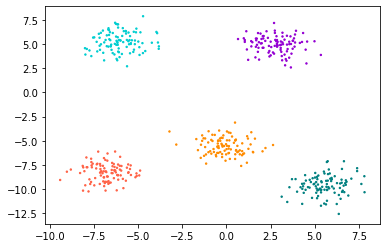

In [12]:
#Lets inspect the clustering model
print("INERTIA = " + str(kmeans_demo.inertia_))
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])
plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.show()

In [15]:
data = pd.read_csv("Mall_Customers.csv")

data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
